# Develop a predictive maintenance model using LSTM-RNN to forecast equipment failures, enabling proactive maintenance and reducing downtime.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load your dataset 
data = pd.read_csv('fraud.csv')
data.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,INR,MasterCard,Online,1
1,2,198766,1777.32,EUR,American Express,Online,1
2,3,198767,3939.01,USD,Visa,In-Person,1
3,4,198768,376.44,USD,Visa,In-Person,0
4,5,198769,1687.33,INR,MasterCard,Online,1


In [15]:
# Data Preprocessing
data = data.drop(['Cust ID', 'Card Num', 'Currency','Trans Mode'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Card Type'])

# Fill missing values (customize as needed)
data = data.fillna(method='ffill')

In [16]:
data.describe()

,Amount,Fraudlabel,Card Type_American Express,Card Type_MasterCard,Card Type_Visa
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2504.591608,0.501250,0.333000,0.334000,0.333000
std,1460.663169,0.500061,0.471345,0.471699,0.471345
min,1.090000,0.000000,0.000000,0.000000,0.000000
25%,1225.152500,0.000000,0.000000,0.000000,0.000000
50%,2520.815000,1.000000,0.000000,0.000000,0.000000
75%,3768.067500,1.000000,1.000000,1.000000,1.000000
max,4996.700000,1.000000,1.000000,1.000000,1.000000


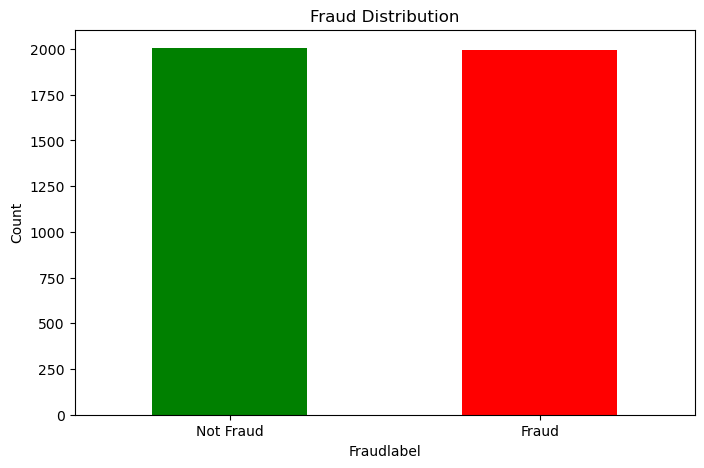

In [17]:
# Plot the distribution of 'IsFraud'
fraud_distribution = data['Fraudlabel'].value_counts()

plt.figure(figsize=(8, 5))
fraud_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Fraud Distribution')
plt.xlabel('Fraudlabel')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)
plt.show()

In [18]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [19]:
# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -1])
    return np.array(X), np.array(y)

sequence_length = 10  # Define sequence length
X, y = create_sequences(data_scaled, sequence_length)

In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model Architecture
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so use sigmoid activation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


80/80 [==============================] - 14s 42ms/step - loss: 0.6441 - accuracy: 0.6663 - val_loss: 0.6328 - val_accuracy: 0.6745
Epoch 2/50
80/80 [==============================] - 1s 16ms/step - loss: 0.6373 - accuracy: 0.6659 - val_loss: 0.6362 - val_accuracy: 0.6745
Epoch 3/50
80/80 [==============================] - 1s 17ms/step - loss: 0.6395 - accuracy: 0.6659 - val_loss: 0.6358 - val_accuracy: 0.6745
Epoch 4/50
80/80 [==============================] - 1s 19ms/step - loss: 0.6383 - accuracy: 0.6659 - val_loss: 0.6325 - val_accuracy: 0.6745
Epoch 5/50
80/80 [==============================] - 2s 20ms/step - loss: 0.6382 - accuracy: 0.6659 - val_loss: 0.6322 - val_accuracy: 0.6745
Epoch 6/50
80/80 [==============================] - 2s 19ms/step - loss: 0.6379 - accuracy: 0.6659 - val_loss: 0.6337 - val_accuracy: 0.6745
Epoch 7/50
80/80 [==============================] - 1s 18ms/step - loss: 0.6371 - accuracy: 0.6659 - val_loss: 0.6340 - val_accuracy: 0.6745
Epoch 8/50

In [23]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

25/25 [==============================] - 0s 12ms/step - loss: 0.6385 - accuracy: 0.6667
Test Loss: 0.6385068297386169, Test Accuracy: 0.6666666865348816


In [24]:
# Predict on the test set
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 7ms/step


In [25]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.4723249028169605


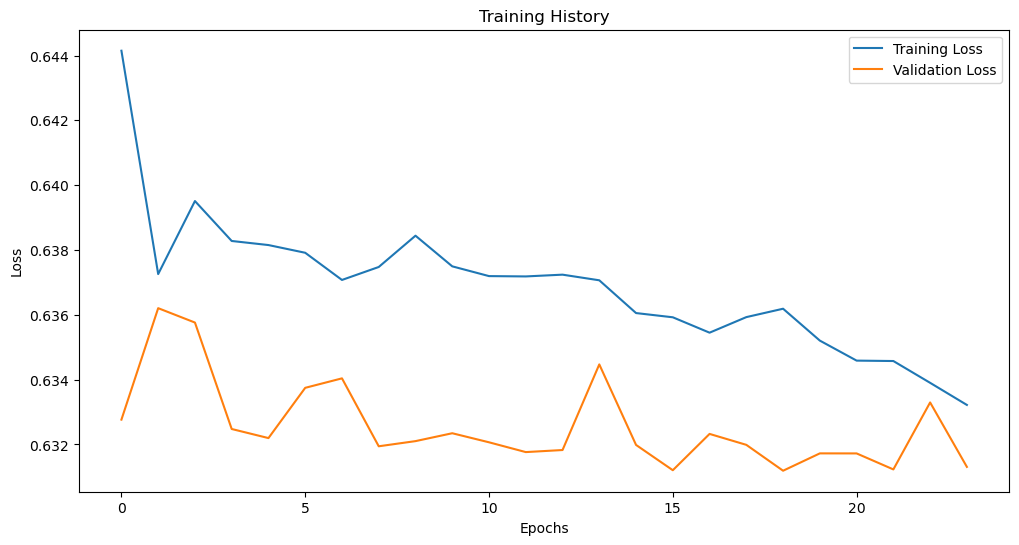

In [26]:
# Visualize Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

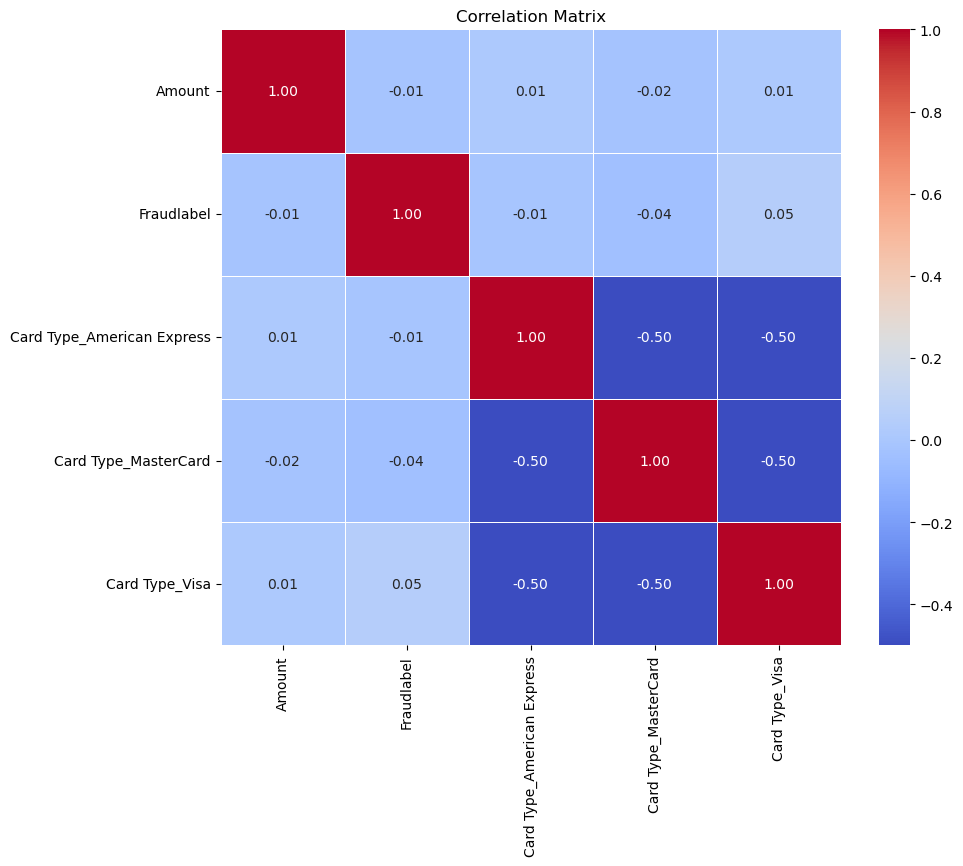

In [27]:
# Calculate the correlation matrix
import seaborn as sns

correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()